In [1]:
using FundamentalsNumericalComputation
FNC.init_format()

┌ Info: verify download of index files...
└ @ MatrixDepot /Users/driscoll/.julia/packages/MatrixDepot/GEDc3/src/MatrixDepot.jl:139
┌ Info: reading database
└ @ MatrixDepot /Users/driscoll/.julia/packages/MatrixDepot/GEDc3/src/download.jl:23
┌ Info: adding metadata...
└ @ MatrixDepot /Users/driscoll/.julia/packages/MatrixDepot/GEDc3/src/download.jl:67
┌ Info: adding svd data...
└ @ MatrixDepot /Users/driscoll/.julia/packages/MatrixDepot/GEDc3/src/download.jl:69
┌ Info: writing database
└ @ MatrixDepot /Users/driscoll/.julia/packages/MatrixDepot/GEDc3/src/download.jl:74
┌ Info: used remote sites are sparse.tamu.edu with MAT index and math.nist.gov with HTML index
└ @ MatrixDepot /Users/driscoll/.julia/packages/MatrixDepot/GEDc3/src/MatrixDepot.jl:141


(section-matrixanaly-insight)=
# From matrix to insight

Any two-dimensional array of numbers may be interpreted as a matrix. Whether or not this is the only point of view that matters to a particular application, it does lead to certain types of analysis. The related mathematical and computational tools are universally applicable and find diverse uses.

## Tables as matrices

Tables are used to represent variation of a quantity with respect to two variables. These variables may be encoded as the rows and columns of a matrix.

````{proof:example}
A *corpus* is a collection of text documents. A *term-document matrix* has one column for each document and one row for each unique term appearing in the corpus. The $(i,j)$ entry of the matrix is the number of times term $i$ appears in document $j$. That is, column $j$ of the matrix is a term-frequency vector quantifying all occurrences of the indexed terms. A new document could be represented by its term-frequency vector, which is then comparable to the columns of the matrix. Or, a new term could be represented by counting its appearances in all of the documents and be compared to the rows of the matrix.

It turns out that by finding the {ref}`singular value decomposition <section-matrixanaly-svd>` of the term-document matrix, the strongest patterns within the corpus can be isolated, frequently corresponding to what we interpret as textual meaning. This is known as *latent semantic analysis.*
````

::::{proof:example}
Each vote cast in the U. S. Congress is [available for download](https://www.congress.gov/roll-call-votes). We can put members of Congress along the columns of a matrix and bills along the rows, recording a number that codes for "yea,"  "nay," "none," etc. The {ref}`singular value decomposition <section-matrixanaly-svd>` can reveal an objective, reproducible analysis of the partisanship and cooperation of individual members.
::::

````{proof:example}
In 2006 the online video service Netflix started an open competition for a $1 million prize. They provided a data set of 100,480,507 ratings (one to five stars) made by 480,189 users for 17,770 movies. Each rating is implicitly an entry in a 17,770-by-480,189 matrix. The object of the prize was to predict a user's ratings for movies they had not rated. This is known as a *matrix completion problem.* (It took 6 days for a contestant to improve on Netflix's private algorithm, and in 2009 the million-dollar prize was awarded to a team that had improved the performance by over 10%.)
````

## Graphs as matrices

```{index} ! graph, ! adjacency matrix
```

::::{proof:definition} Graphs and adjacency matrices
A **graph** or *network* consists of a set $V$ of **nodes** and a set $E$ of **edges**, each of which is an ordered pair of nodes. The graph is **undirected** if for every edge $(v_i,v_j)$, the pair $(v_j,v_i)$ is also an edge; otherwise the graph is **directed**.

The **adjacency matrix** of a graph with $n$ nodes $V$ and edge set $E$ is the $n\times n$ matrix whose elements are

```{math}
:label: adjmat
A_{ij} =
\begin{cases}
1 & \text{if $(v_i,v_j)\in E$ (i.e., there is an edge from node $i$ to node $j$)},\\
0 & \text{otherwise}.
\end{cases}
```
::::

Graphs are a useful way to represent the link structure of social networks, airline routes, power grids, sports teams, and web pages, to name a few examples. The natural interpretation is that the edge $(v_i,v_j)$ denotes a link from node $i$ to node $j$, in which case we say that node $i$ is **adjacent** to node $j$. One usually visualizes small graphs by drawing points for nodes and arrows or lines for the edges.

Here are some elementary results about adjacency matrices. 

(theorem-insight-adjmat)=
::::{proof:theorem}
For any graph with adjacency matrix $\mathbf{A}$,

1. The graph is undirected if and only if $\mathbf{A}$ is symmetric, and
2. For any positive integer $k$, the $(i,j)$ element of $\mathbf{A}^k$ is the number of ways to walk from node $i$ to node $j$ by following along exactly $k$ edges.
::::

::::{proof:proof}
Part 1 follows immediately from the definitions. Part 2 is clearly true for $k=1$. Assume inductively that it is true for $k-1$. Each walk of length $k$ from node $i$ to node $j$ must be a walk of length $k-1$ from $i$ to node $p$, then a walk of length 1 from node $p$ to node $j$. The total number of such walks is therefore

$$
\sum_{p=1}^n [\mathbf{A}^{k-1}]_{ip} \cdot A_{pj},
$$

which is the $(i,j)$ element of $\mathbf{A}^k$.
::::


(demo-insight-graph)=
```{proof:demo}
```

```{raw} html
<div class='demo'>
```

```{raw} latex
%%start demo%%
```

Here we create an adjacency matrix for a graph on four nodes.

In [2]:
A = [ 0 1 0 0; 1 0 0 0; 1 1 0 1; 0 1 1 0 ]

4×4 Matrix{Int64}:
 0  1  0  0
 1  0  0  0
 1  1  0  1
 0  1  1  0

```{index} ! Julia; graphplot
```

The `graphplot` function makes a visual representation of this graph.

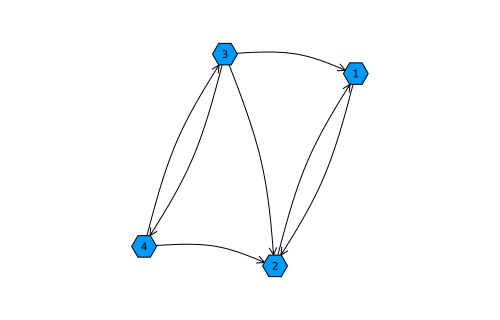

In [3]:
graphplot(A,names=1:4,markersize=0.2,arrow=6)

Since this adjacency matrix is not symmetric, the edges are all directed, as indicated by the arrows. Here are the counts of all walks of length 3 in the graph:

In [4]:
A^3

4×4 Matrix{Int64}:
 0  1  0  0
 1  0  0  0
 3  2  0  1
 1  3  1  0

If the adjacency matrix is symmetric, the result is an undirected graph: all edges connect in both directions.

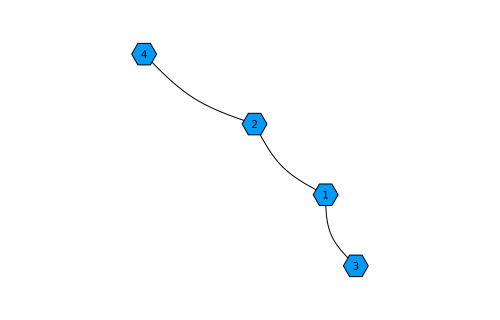

In [5]:
A = [0 1 1 0;1 0 0 1;1 0 0 0;0 1 0 0]
graphplot(A,names=1:4,markersize=0.2)

```{raw} html
</div>
```

```{raw} latex
%%end demo%%
```

The representation of a graph by its adjacency matrix opens up the possibility of many kinds of analysis of the graph. One might ask whether the nodes admit a natural partition into clusters, for example. Or one might ask to rank the nodes in order of importance to the network as determined by some objective criteria—an application made famous by Google's PageRank algorithm, and one which is mathematically stated as an {ref}`eigenvalue <section-matrixanaly-evd>` problem.

## Images as matrices

```{index} image (as a matrix)
```

Computers typically represent images as rectangular arrays of pixels, each of which is colored according to numerical values for red (R), green (G), and blue (B) components of white light. Most often, these are given as integers in the range from zero (no color) to 255 (full color). Thus, an image that is $m$-by-$n$ pixels can be stored as an $m$-by-$n$-by-3 array of integer values. In Julia, we can work with an $m\times n$ matrix of 3-vectors representing entire colors.

(demo-insight-image)=
```{proof:demo}
```

```{raw} html
<div class='demo'>
```

```{raw} latex
%%start demo%%
```

```{index} ! Julia; Images
```

The `Images` package has many functions for image manipulation, and `TestImages` has some standard images to play with.

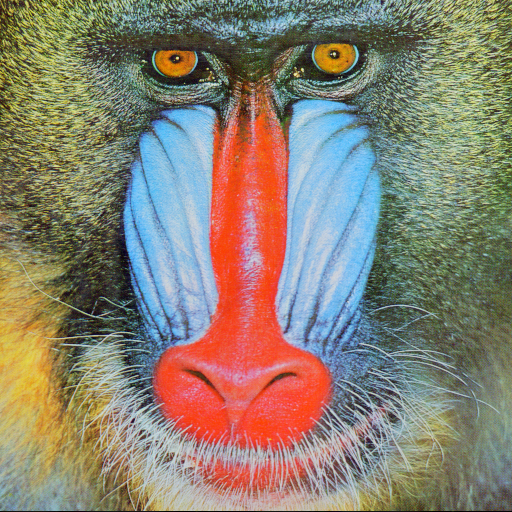

In [6]:
img = testimage("mandrill")

The variable `img` is a matrix.

In [7]:
size(img)

(512, 512)

However, its entries are colors, not numbers.

In [8]:
img[100,10]

```{index} ! Julia; eltype
```

You can use `eltype` to find out the type of the elements of any array.

In [9]:
eltype(img)

RGB{N0f8}

It's possible to extract matrices of red, green, and blue intensities, scaled from 0 to 1.

In [10]:
R,G,B = red.(img),green.(img),blue.(img);
@show minB,maxB = extrema(B);

(minB, maxB) = extrema(B) = (0.0N0f8, 1.0N0f8)


Or we can convert the pixels to gray, each pixel again scaled from 0 to 1.

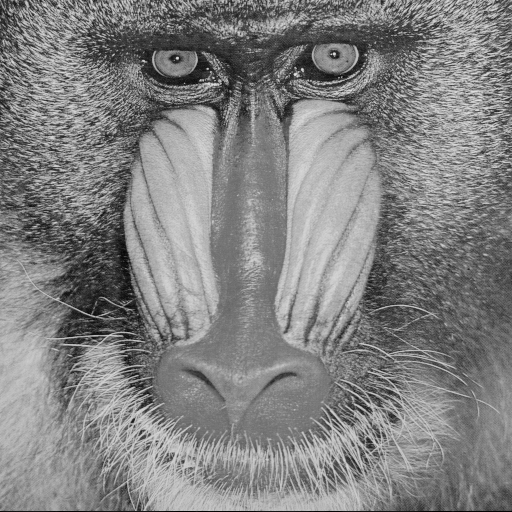

In [11]:
Gray.(img)

In order to do our usual operations, we need to tell Julia that we want to interpret the elements of the image matrix as floating-point values.

In [12]:
A = Float64.(Gray.(img))
A[1:4,1:5]

4×5 Matrix{Float64}:
 0.568627  0.219608  0.192157  0.34902   0.537255
 0.454902  0.396078  0.156863  0.262745  0.352941
 0.301961  0.447059  0.180392  0.180392  0.384314
 0.278431  0.533333  0.372549  0.188235  0.32549

We can use `Gray` to reinterpret a matrix of floating-point values as grayscale pixels.

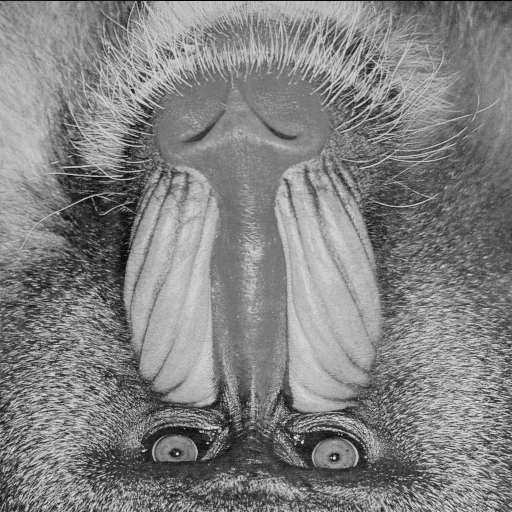

In [13]:
Gray.(reverse(A,dims=1))

```{raw} html
</div>
```

```{raw} latex
%%end demo%%
```

Representation of an image as a matrix allows us to describe some common image operations in terms of linear algebra. For example, in {numref}`section-matrixanaly-svd` we will use the singular value decomposition to compress the information, and in {numref}`section-krylov-matrixfree` we will see how to apply and remove blurring effects.

## Exercises

1. ✍ Consider the terms *numerical*, *analysis*, and *fun*. Write out the term-document matrix for the following statements:

    **(a)** Numerical analysis is the most fun type of analysis.

    **(b)** It's fun to produce numerical values for the digits of pi.

    **(c)** Complex analysis is a beautiful branch of mathematics.

2. ✍ Write out the adjacency matrix for the following graph on six nodes.
    
    ```{image} littlegraph.png
    :alt: little graph
    :width: 500px
    :align: center
    ```

3. ✍ Here is a graph adjacency matrix.
  
    :::{math}
    \begin{bmatrix}
    0 & 1 & 0 & 1 & 0 & 1 & 0 \\
    1 & 0 & 1 & 0 & 0 & 1 & 0 \\
    0 & 1 & 0 & 0 & 1 & 0 & 1 \\
    1 & 0 & 0 & 0 & 0 & 0 & 0 \\
    0 & 0 & 1 & 0 & 0 & 1 & 0 \\
    1 & 1 & 0 & 0 & 1 & 0 & 0 \\
    0 & 0 & 1 & 0 & 0 & 0 & 0   
    \end{bmatrix}
    :::

    **(a)** How many vertices are adjacent to vertex 5?

    **(b)** How many edges are in the graph?

    **(c)** Is the graph directed or undirected?

    **(d)** Draw the graph. 

4. ⌨ Refer to {numref}`Demo %s <demo-insight-image>` on loading and displaying test images.

    **(a)** Display the "lighthouse" test image upside-down.

    **(b)** Display it mirror-reversed from left to right. 

    **(c)** Display the image so that it is cropped to isolate the black beacon section at the top of the lighthouse. 

    (problem-insight-actors)=
5. ⌨ For this problem you need to download and import data via:
   
   ```julia
   datafile = download("https://tobydriscoll.net/fnc-julia/_static/resources/actors.jld2")
   @load datafile A
   ```
    Based on data provided by the Self-Organized Networks Database at the University of Notre Dame, it contains information about the appearances of 392,400 actors in 127,823 movies, as given by the Internet Movie Database. The matrix $\mathbf{A}$ has $A_{ij}=1$ if actor $j$ appeared in movie $i$ and zero elements elsewhere.

    **(a)** What is the maximum number of actors appearing in any one movie?

    **(b)** How many actors appeared in exactly three movies?

    **(c)** Define $\mathbf{C}=\mathbf{A}^T\mathbf{A}$. How many nonzero entries does $\mathbf{C}$ have? What is the interpretation of $C_{ij}$?